#### kosis.kr : 1인당 전력사용량
- wide 형태 csv 읽어오기, long 형태로 stack/unstack 사용 변환, long 형태로 작업
- 경제성장률, 1인당 전력사용량 간의 상관 관계(피어슨)
- 년도별, 용도별(주택용, 일반용...) 판매전력량 (양, 비율)

In [1195]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fn = '연도별_전력수급_실적_20230405210351_wide.csv'

pd_data = pd.read_csv(fn, encoding='cp949')

pd_data.head()

pd_data.set_index('실적구분별(1)', inplace=True)

pd_data = pd_data.stack()
pd_data = pd_data.unstack(level=0)

pd_data
# pd_data.transpose()

실적구분별(1),경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0
2019,2.0,520499.0,72639.0,116227.0,8561.0,289240.0,18882.0,3571.0,11379.0,10039.0


In [1196]:
# 경제성장률, 1인당 전력사용량 간의 상관관계

sub_data = pd_data[['경제성장률 (%)', '인구1인당전력소비량 (kWh/년)']]

np_data = sub_data.to_numpy()

np_data

array([[ 6.5000e+00,  8.8830e+03],
       [ 3.7000e+00,  9.1420e+03],
       [ 2.3000e+00,  9.3310e+03],
       [ 2.9000e+00,  9.2850e+03],
       [ 3.3000e+00,  9.3050e+03],
       [ 2.6000e+00,  9.5550e+03],
       [ 2.8000e+00,  9.6990e+03],
       [ 3.1000e+00,  9.8690e+03],
       [ 2.7000e+00,  1.0195e+04],
       [ 2.0000e+00,  1.0039e+04],
       [-1.0000e+00,  9.8260e+03],
       [ 4.0000e+00,  1.0330e+04]])

In [1197]:
xs = np_data[:,0]
ys = np_data[:,1]

corr = np.corrcoef(xs, ys)[0,1]
print('상관도 : ', corr)

상관도 :  -0.41398775995325837


-109.1515792255848 9939.032509581077


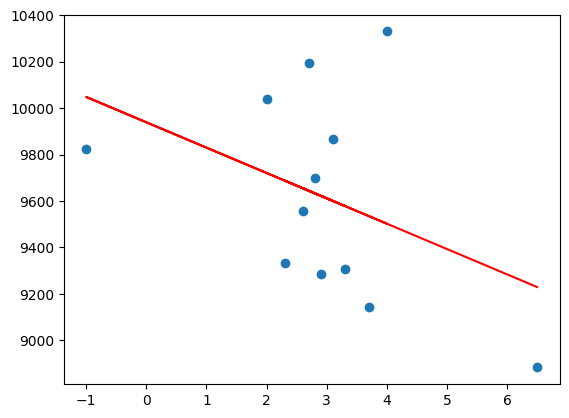

In [1198]:
std_x = np.std(xs)
std_y = np.std(ys)
mean_x = np.mean(xs)
mean_y = np.mean(ys)
# print(std_x, std_y, mean_x, mean_y)

a = corr * (std_y/std_x)
b = mean_y - (a*mean_x)
print(a,b)

_, axe = plt.subplots()
axe.scatter(xs,ys)

# 회귀선
axe.plot(xs, a*xs+b, color='red')

In [1199]:
pd_data.index.name = '년도별'

# pd_data.index

# pd_data = pd_data.iloc[:, 2:9]
# print(pd_data)
# pd_data = pd_data.stack()

pd_data.reset_index(inplace=True)
print(pd_data)

실적구분별(1)   년도별  경제성장률 (%)  판매전력량 (백만kWh)  주택용판매전력량 (백만kWh)  일반용판매전력량 (백만kWh)  \
0         2010        6.5       434160.0           63199.0           97410.0   
1         2011        3.7       455070.0           63523.0           99504.0   
2         2012        2.3       466593.0           65484.0          101593.0   
3         2013        2.9       474849.0           65815.0          102196.0   
4         2014        3.3       477592.0           64457.0          100761.0   
5         2015        2.6       483655.0           65619.0          103679.0   
6         2016        2.8       497039.0           68057.0          108617.0   
7         2017        3.1       507746.0           68544.0          111298.0   
8         2018        2.7       526149.0           72895.0          116934.0   
9         2019        2.0       520499.0           72639.0          116227.0   
10        2020       -1.0       509270.0           76303.0          113639.0   
11        2021        4.0       533431.0

In [1200]:
pd_data_1 = pd_data.set_index('년도별')

pd_data_1

실적구분별(1),경제성장률 (%),판매전력량 (백만kWh),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh),인구1인당전력소비량 (kWh/년)
년도별,,,,,,,,,,
2010,6.5,434160.0,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0,8883.0
2011,3.7,455070.0,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0,9142.0
2012,2.3,466593.0,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0,9331.0
2013,2.9,474849.0,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0,9285.0
2014,3.3,477592.0,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0,9305.0
2015,2.6,483655.0,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0,9555.0
2016,2.8,497039.0,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0,9699.0
2017,3.1,507746.0,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0,9869.0
2018,2.7,526149.0,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0,10195.0


In [1201]:
pd_data_1 = pd_data_1.iloc[:, 2:9]

pd_data_1

실적구분별(1),주택용판매전력량 (백만kWh),일반용판매전력량 (백만kWh),교육용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),가로등판매전력량 (백만kWh),심야판매전력량 (백만kWh)
년도별,,,,,,,
2010,63199.0,97410.0,7452.0,232672.0,10654.0,3081.0,19690.0
2011,63523.0,99504.0,7568.0,251491.0,11232.0,3145.0,18607.0
2012,65484.0,101593.0,7860.0,258102.0,12776.0,3158.0,17620.0
2013,65815.0,102196.0,7947.0,265373.0,13866.0,3156.0,16496.0
2014,64457.0,100761.0,7438.0,272552.0,14505.0,3221.0,14658.0
2015,65619.0,103679.0,7691.0,273548.0,15702.0,3341.0,14075.0
2016,68057.0,108617.0,8079.0,278828.0,16580.0,3462.0,13416.0
2017,68544.0,111298.0,8316.0,285970.0,17251.0,3557.0,12811.0
2018,72895.0,116934.0,8678.0,292999.0,18504.0,3583.0,12558.0


In [1202]:
pd_data_1 = pd_data_1.stack()
g1 = pd_data_1.groupby(['년도별', '실적구분별(1)'])
df1 = g1.sum()

df1

년도별   실적구분별(1)        
2010  가로등판매전력량 (백만kWh)      3081.0
      교육용판매전력량 (백만kWh)      7452.0
      농사용판매전력량 (백만kWh)     10654.0
      산업용판매전력량 (백만kWh)    232672.0
      심야판매전력량 (백만kWh)      19690.0
                            ...   
2021  농사용판매전력량 (백만kWh)     20603.0
      산업용판매전력량 (백만kWh)    291333.0
      심야판매전력량 (백만kWh)      10162.0
      일반용판매전력량 (백만kWh)    119550.0
      주택용판매전력량 (백만kWh)     79915.0
Length: 84, dtype: float64

In [1203]:
# pd_data_1 = pd_data_1.unstack(level=1)
print(pd_data_1.head())


년도별   실적구분별(1)        
2010  주택용판매전력량 (백만kWh)     63199.0
      일반용판매전력량 (백만kWh)     97410.0
      교육용판매전력량 (백만kWh)      7452.0
      산업용판매전력량 (백만kWh)    232672.0
      농사용판매전력량 (백만kWh)     10654.0
dtype: float64


In [1204]:
g2 = pd_data_1.groupby(['년도별'])

df2 = g2.sum()

df2

년도별
2010    434158.0
2011    455070.0
2012    466593.0
2013    474849.0
2014    477592.0
2015    483655.0
2016    497039.0
2017    507747.0
2018    526151.0
2019    520499.0
2020    509269.0
2021    533430.0
dtype: float64

In [1205]:
pd_data_2 = pd_data.set_index('년도별')
pd_data_2 = pd_data_2.iloc[:,2:9]

In [1206]:
pd_data_2 = pd.concat([pd_data_2, df2], axis=1)

pd_data_2 = pd_data_2.stack()

pd_data_2.rename(index={0:'총합'}, inplace=1)

pd_data_2

년도별                   
2010  주택용판매전력량 (백만kWh)     63199.0
      일반용판매전력량 (백만kWh)     97410.0
      교육용판매전력량 (백만kWh)      7452.0
      산업용판매전력량 (백만kWh)    232672.0
      농사용판매전력량 (백만kWh)     10654.0
                            ...   
2021  산업용판매전력량 (백만kWh)    291333.0
      농사용판매전력량 (백만kWh)     20603.0
      가로등판매전력량 (백만kWh)      3444.0
      심야판매전력량 (백만kWh)      10162.0
      총합                  533430.0
Length: 96, dtype: float64

In [1207]:
pd_data_2 = pd_data_2.unstack()

pd_data_2

,가로등판매전력량 (백만kWh),교육용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),심야판매전력량 (백만kWh),일반용판매전력량 (백만kWh),주택용판매전력량 (백만kWh),총합
년도별,,,,,,,,
2010,3081.0,7452.0,10654.0,232672.0,19690.0,97410.0,63199.0,434158.0
2011,3145.0,7568.0,11232.0,251491.0,18607.0,99504.0,63523.0,455070.0
2012,3158.0,7860.0,12776.0,258102.0,17620.0,101593.0,65484.0,466593.0
2013,3156.0,7947.0,13866.0,265373.0,16496.0,102196.0,65815.0,474849.0
2014,3221.0,7438.0,14505.0,272552.0,14658.0,100761.0,64457.0,477592.0
2015,3341.0,7691.0,15702.0,273548.0,14075.0,103679.0,65619.0,483655.0
2016,3462.0,8079.0,16580.0,278828.0,13416.0,108617.0,68057.0,497039.0
2017,3557.0,8316.0,17251.0,285970.0,12811.0,111298.0,68544.0,507747.0
2018,3583.0,8678.0,18504.0,292999.0,12558.0,116934.0,72895.0,526151.0


In [1209]:
df3 = pd.DataFrame()
for i in range(7) :
  df3[f'{pd_data_2.columns[i]}'] = pd_data_2.iloc[:,i]/pd_data_2.iloc[:,-1]
  
df3

,가로등판매전력량 (백만kWh),교육용판매전력량 (백만kWh),농사용판매전력량 (백만kWh),산업용판매전력량 (백만kWh),심야판매전력량 (백만kWh),일반용판매전력량 (백만kWh),주택용판매전력량 (백만kWh)
년도별,,,,,,,
2010,0.007096,0.017164,0.024539,0.535915,0.045352,0.224365,0.145567
2011,0.006911,0.016630,0.024682,0.552642,0.040888,0.218656,0.139590
2012,0.006768,0.016846,0.027381,0.553163,0.037763,0.217734,0.140345
2013,0.006646,0.016736,0.029201,0.558858,0.034739,0.215218,0.138602
2014,0.006744,0.015574,0.030371,0.570680,0.030691,0.210977,0.134962
2015,0.006908,0.015902,0.032465,0.565585,0.029101,0.214366,0.135673
2016,0.006965,0.016254,0.033358,0.560978,0.026992,0.218528,0.136925
2017,0.007005,0.016378,0.033976,0.563214,0.025231,0.219200,0.134996
2018,0.006810,0.016493,0.035169,0.556872,0.023868,0.222244,0.138544
